<a href="https://colab.research.google.com/github/austintnguyen/CSE151A_Project/blob/main/CSE151A_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/austintnguyen/CSE151A_Project.git

Cloning into 'CSE151A_Project'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 85 (delta 40), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (85/85), 1.31 MiB | 3.84 MiB/s, done.
Resolving deltas: 100% (40/40), done.


# Data Exploration

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.get_dataset_names()
loandf = pd.read_csv('CSE151A_Project/Bankloan.csv')
loandf.head()


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17,12,176.0,9.3,11.359392,5.008608,1
1,27.0,1.0,10,6,31.0,17.3,1.362202,4.000798,0
2,40.0,1.0,15,7,NaN,5.5,0.856075,2.168925,0
3,41.0,NaN,15,14,120.0,2.9,2.658720,0.821280,0
4,24.0,2.0,2,0,28.0,17.3,1.787436,3.056564,1


In [ ]:
loandf.isna().sum()

age         19
ed          20
employ       0
address      0
income      37
debtinc      0
creddebt     0
othdebt      0
default      0
dtype: int64

# Data Preprocessing

In [ ]:
loandf = loandf.dropna()

In [ ]:
loandf.describe().round(2)

,age,ed,employ,address,income,debtinc,creddebt,othdebt
count,626.00,626.00,626.00,626.00,626.00,626.00,626.00,626.00
mean,35.01,1.72,8.36,8.24,45.62,10.23,1.54,3.02
std,8.97,0.92,6.74,6.80,37.86,6.75,2.15,3.16
min,20.00,1.00,0.00,0.00,14.00,0.40,0.01,0.05
25%,28.25,1.00,3.00,3.00,24.00,5.03,0.37,1.05
50%,34.00,1.00,7.00,7.00,34.00,8.70,0.84,1.99
75%,40.00,2.00,12.00,12.00,53.75,14.00,1.88,3.95
max,136.00,5.00,31.00,34.00,446.00,41.30,20.56,27.03


In [ ]:
loandf = loandf[loandf['age' ] <= 116]
#get rid of invalid inputs, such as invalid ages

In [ ]:
loandf.describe().round(2)

,age,ed,employ,address,income,debtinc,creddebt,othdebt
count,625.00,625.00,625.00,625.00,625.00,625.00,625.00,625.00
mean,34.85,1.72,8.35,8.24,45.64,10.24,1.54,3.02
std,8.01,0.92,6.74,6.80,37.89,6.75,2.15,3.16
min,20.00,1.00,0.00,0.00,14.00,0.40,0.01,0.05
25%,28.00,1.00,3.00,3.00,24.00,5.10,0.37,1.05
50%,34.00,1.00,7.00,7.00,34.00,8.70,0.85,2.00
75%,40.00,2.00,12.00,12.00,54.00,14.00,1.88,3.95
max,56.00,5.00,31.00,34.00,446.00,41.30,20.56,27.03


In [ ]:
loandf_target = pd.DataFrame(loandf ,columns = ['default'])
loandf_target

,default
0,1
1,0
4,1
5,0
8,1
...,...
694,0
695,1
696,0
697,0


In [ ]:
loandf_target.value_counts()

default
0          461
1          162
'0'          1
:0           1
dtype: int64

In [ ]:
loandf_target = loandf_target.replace('\'0\'', '0')
loandf_target = loandf_target.replace(':0', '0')

In [ ]:
loandf = loandf.replace('\'0\'', '0')
loandf = loandf.replace(':0', '0')

In [ ]:
loandf_target.dtypes

default    object
dtype: object

In [ ]:
loandf_target.value_counts()


default
0          463
1          162
dtype: int64

In [ ]:
loandf_target = loandf_target.astype('int64')

In [ ]:
loandf = loandf.astype('int64')

In [ ]:
loandf_target.dtypes

default    int64
dtype: object

In [ ]:
loandf_target.describe()

,default
count,625.000000
mean,0.259200
std,0.438547
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: ylabel='Count'>

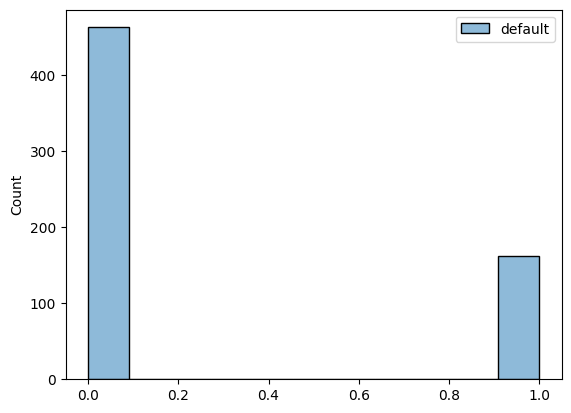

In [ ]:
sns.histplot(loandf_target)

High number of zeros means most people payed off loan

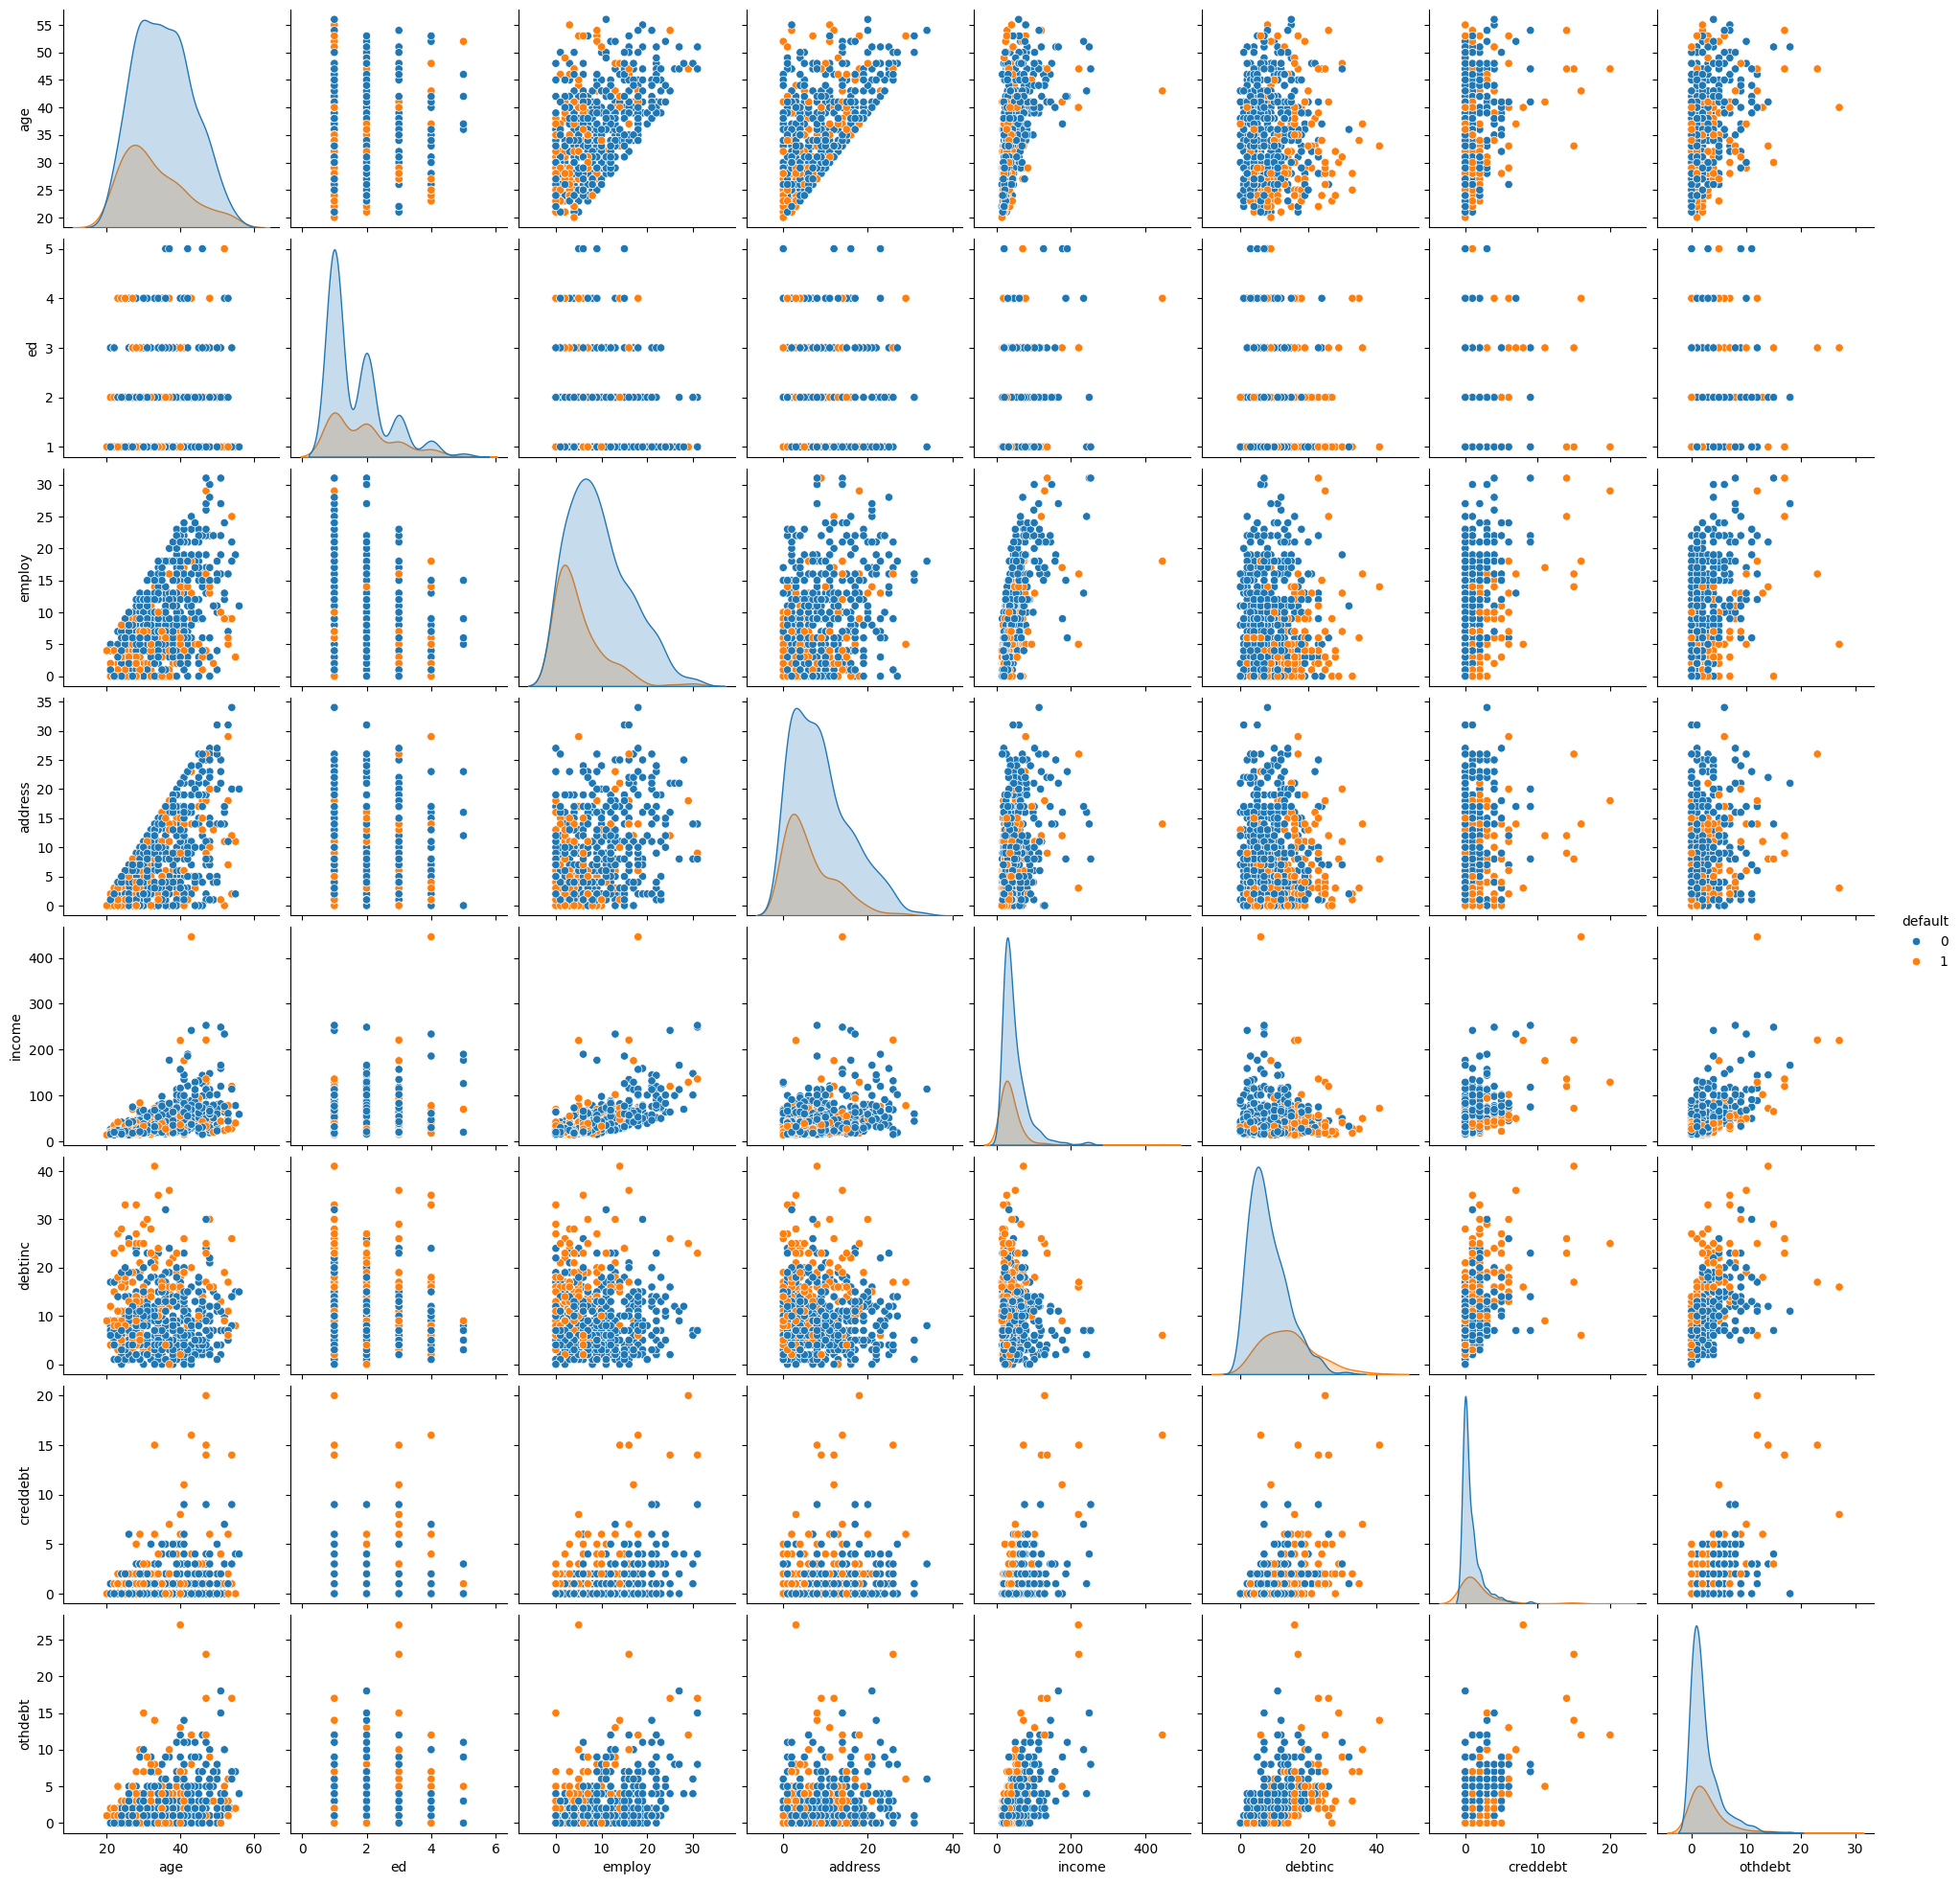

In [ ]:
sns.pairplot(loandf, diag_kind='kde', hue = 'default')

In [ ]:
corr = loandf.corr()
corr

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.051526,0.538428,0.593904,0.486902,0.010323,0.294472,0.353888,-0.136551
ed,0.051526,1.000000,-0.115395,0.078997,0.256390,0.006566,0.093562,0.165638,0.096590
employ,0.538428,-0.115395,1.000000,0.327991,0.618661,-0.036863,0.397154,0.418983,-0.286202
address,0.593904,0.078997,0.327991,1.000000,0.324901,0.000053,0.211978,0.231520,-0.167560
income,0.486902,0.256390,0.618661,0.324901,1.000000,-0.041275,0.573318,0.627556,-0.072813
debtinc,0.010323,0.006566,-0.036863,0.000053,-0.041275,1.000000,0.467763,0.553015,0.384328
creddebt,0.294472,0.093562,0.397154,0.211978,0.573318,0.467763,1.000000,0.642707,0.237837
othdebt,0.353888,0.165638,0.418983,0.231520,0.627556,0.553015,0.642707,1.000000,0.127795
default,-0.136551,0.096590,-0.286202,-0.167560,-0.072813,0.384328,0.237837,0.127795,1.000000


<Axes: >

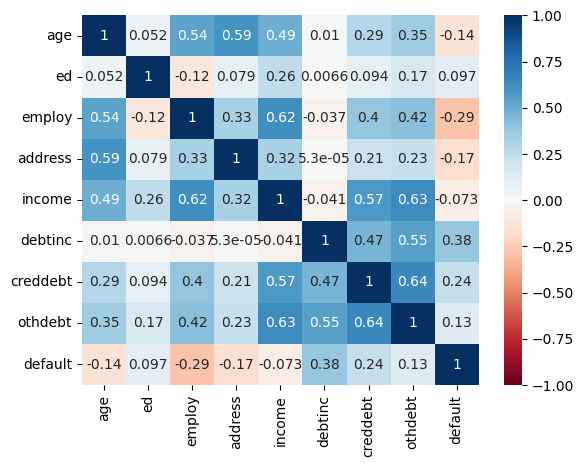

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

Because 0 means loan was payed off, we can see that age, years at same employer, years at same address all increase chances of loan being paid off as they increase.

In [ ]:
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [ ]:
columnNames = loandf.columns
for columnname in columnNames:
    print(columnname)
    print(shapiro(loandf[columnname]))

age
ShapiroResult(statistic=0.9730815291404724, pvalue=2.634827245273641e-09)
ed
ShapiroResult(statistic=0.7563673257827759, pvalue=2.377370782153865e-29)
employ
ShapiroResult(statistic=0.9248042106628418, pvalue=3.9608815713162684e-17)
address
ShapiroResult(statistic=0.9164652824401855, pvalue=4.435573641490543e-18)
income
ShapiroResult(statistic=0.6599355936050415, pvalue=1.865240824093212e-33)
debtinc
ShapiroResult(statistic=0.9239591360092163, pvalue=3.148342386477674e-17)
creddebt
ShapiroResult(statistic=0.5445749759674072, pvalue=2.7700276134301653e-37)
othdebt
ShapiroResult(statistic=0.7238534688949585, pvalue=7.362981110867048e-31)
default
ShapiroResult(statistic=0.5460900068283081, pvalue=3.071722240228704e-37)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
columnNames = loandf.columns
normdf = pd.DataFrame(scaler.fit_transform(loandf), columns = columnNames)

In [ ]:
normdf.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,0.412444,0.180000,0.269419,0.242353,0.073230,0.239102,0.055040,0.093926,0.259200
std,0.222546,0.230402,0.217480,0.200049,0.087700,0.165090,0.106531,0.117734,0.438547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.096774,0.088235,0.023148,0.121951,0.000000,0.037037,0.000000
50%,0.388889,0.000000,0.225806,0.205882,0.046296,0.195122,0.000000,0.037037,0.000000
75%,0.555556,0.250000,0.387097,0.352941,0.092593,0.341463,0.050000,0.111111,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
loandf.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,34.848000,1.720000,8.352000,8.240000,45.635200,9.803200,1.100800,2.536000,0.259200
std,8.011666,0.921607,6.741871,6.801678,37.886318,6.768706,2.130611,3.178816,0.438547
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.000000,1.000000,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.000000,0.000000,1.000000,0.000000
75%,40.000000,2.000000,12.000000,12.000000,54.000000,14.000000,1.000000,3.000000,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.000000,20.000000,27.000000,1.000000


# Logistic Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as sk
from sklearn.metrics import classification_report

In [ ]:
features = normdf.drop(columns = ['age', 'ed', 'income', 'othdebt', 'default'])

target = normdf['default']

features_train, features_test, target_train, target_test = sk.train_test_split(features, target, test_size = 0.2, random_state = 21)

model = LogisticRegression()

model.fit(features_train, target_train)

yhattrain = model.predict(features_train)

yhattest = model.predict(features_test)

mse = mean_squared_error(target_train,yhattrain)

print('Training MSE: %8.15f' % mse)

mse = mean_squared_error(target_test,yhattest)

print('Testing MSE: %8.15f' % mse)





Training MSE: 0.204000000000000
Testing MSE: 0.216000000000000


In [ ]:
print(classification_report(target_train, yhattrain))

              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88       370
         1.0       0.78      0.30      0.43       130

    accuracy                           0.80       500
   macro avg       0.79      0.64      0.65       500
weighted avg       0.79      0.80      0.76       500



In [ ]:
print(classification_report(target_test, yhattest))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        93
         1.0       0.65      0.34      0.45        32

    accuracy                           0.78       125
   macro avg       0.73      0.64      0.66       125
weighted avg       0.76      0.78      0.76       125



In [ ]:
pip install scikeras

In [ ]:
def buildmodel():
    return LogisticRegression()


In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [ ]:
# Cross Validation
mod = LogisticRegression()

validation = cross_val_score(mod, features_train, target_train, cv = 10, scoring = 'accuracy')

validation.mean()

0.796

# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [ ]:

classifier = Sequential() # Initialising the ANN
classifier.add(Dense(units = 32, activation = 'relu', input_dim = 4))
classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(Dense(units = 12, activation = 'relu'))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = SGD(learning_rate = 0.05), loss = 'binary_crossentropy', metrics =['mse', 'accuracy'])

classifier.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1037 (4.05 KB)
Trainable params: 1037 (4.0

In [ ]:
train = classifier.fit(features_train, target_train, batch_size = 1, epochs = 15, verbose = 1)
train.history

Epoch 1/15
500/500 [==============================] - 2s 2ms/step - loss: 0.5758 - mse: 0.1941 - accuracy: 0.7400
Epoch 2/15
500/500 [==============================] - 1s 3ms/step - loss: 0.5076 - mse: 0.1671 - accuracy: 0.7620
Epoch 3/15
500/500 [==============================] - 1s 3ms/step - loss: 0.4765 - mse: 0.1550 - accuracy: 0.7720
Epoch 4/15
500/500 [==============================] - 1s 3ms/step - loss: 0.4633 - mse: 0.1515 - accuracy: 0.7580
Epoch 5/15
500/500 [==============================] - 1s 3ms/step - loss: 0.4626 - mse: 0.1519 - accuracy: 0.7760
Epoch 6/15
500/500 [==============================] - 1s 3ms/step - loss: 0.4430 - mse: 0.1439 - accuracy: 0.7840
Epoch 7/15
500/500 [==============================] - 1s 3ms/step - loss: 0.4419 - mse: 0.1433 - accuracy: 0.7740
Epoch 8/15
500/500 [==============================] - 1s 3ms/step - loss: 0.4376 - mse: 0.1404 - accuracy: 0.7920
Epoch 9/15
500/500 [==============================] - 1s 3ms/step - loss: 0.4300 - mse: 

{'loss': [0.5757803320884705,
  0.5075576901435852,
  0.4764856696128845,
  0.4633316993713379,
  0.46264660358428955,
  0.4429779350757599,
  0.44192439317703247,
  0.4376322329044342,
  0.42999958992004395,
  0.42896994948387146,
  0.41361576318740845,
  0.41968342661857605,
  0.4183477461338043,
  0.429750919342041,
  0.4171629846096039],
 'mse': [0.1941239833831787,
  0.1671365648508072,
  0.1550132930278778,
  0.15152928233146667,
  0.15194927155971527,
  0.14389607310295105,
  0.1432705968618393,
  0.14042459428310394,
  0.13961249589920044,
  0.13770265877246857,
  0.13346993923187256,
  0.13502109050750732,
  0.13148753345012665,
  0.13718245923519135,
  0.13178901374340057],
 'accuracy': [0.7400000095367432,
  0.7620000243186951,
  0.7720000147819519,
  0.7580000162124634,
  0.7760000228881836,
  0.7839999794960022,
  0.7739999890327454,
  0.7919999957084656,
  0.7820000052452087,
  0.7960000038146973,
  0.8019999861717224,
  0.7919999957084656,
  0.8140000104904175,
  0.80599

In [ ]:
yhat_test = classifier.predict(features_test)

yhat_test = np.array(yhat_test)

yhat_test = np.where(yhat_test >= 0.5, 1, 0)

yhat_test

4/4 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
yhat_train = classifier.predict(features_train)

yhat_train = np.array(yhat_train)

yhat_train = np.where(yhat_train >= 0.5, 1, 0)

yhat_train


16/16 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
print(classification_report(target_test, yhat_test))
print(classification_report(target_train, yhat_train))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86        93
         1.0       0.62      0.31      0.42        32

    accuracy                           0.78       125
   macro avg       0.71      0.62      0.64       125
weighted avg       0.75      0.78      0.75       125

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87       370
         1.0       0.83      0.23      0.36       130

    accuracy                           0.79       500
   macro avg       0.81      0.61      0.62       500
weighted avg       0.80      0.79      0.74       500



In [ ]:
pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import keras
import keras_tuner
from keras import layers

In [ ]:
hp = keras_tuner.HyperParameters()

In [ ]:
def buildHPmodel(hp):
  model= Sequential([
      Dense(
              # Tune number of units.
              units=hp.Int("units", min_value=8, max_value=64, step=8),
              # Tune the activation function to use.
              activation=hp.Choice("activation", ["relu", "sigmoid", "tanh"]),
      input_dim = 4),
      Dense(
              # Tune number of units.
              units=hp.Int("units1", min_value=8, max_value=64, step=8),
              # Tune the activation function to use.
              activation=hp.Choice("activation1", ["relu", "sigmoid", "tanh"]),
      ),
            Dense(
              # Tune number of units.
              units=hp.Int("units2", min_value=8, max_value=64, step=8),
              # Tune the activation function to use.
              activation=hp.Choice("activation2", ["relu", "sigmoid", "tanh"]),
      ),
            Dense(
              # Tune number of units.
              units=hp.Int("units3", min_value=8, max_value=64, step=8),
              # Tune the activation function to use.
              activation=hp.Choice("activation3", ["relu", "sigmoid", "tanh"]),
      # ),
      #       Dense(
      #         # Tune number of units.
      #         units=hp.Int("units", min_value=8, max_value=64, step=8),
      #         # Tune the activation function to use.
      #         activation=hp.Choice("activation", ["relu", "sigmoid", "tanh"]),
      #
              )
      ,
      Dense(1, activation = 'sigmoid')
])
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['mse', 'accuracy'])
  return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=buildHPmodel,
    objective="val_accuracy",
    max_trials=50,
    seed=15,
    executions_per_trial=2,
    hyperparameters=hp,
    tune_new_entries=True,
    allow_new_entries=True,
    #max_retries_per_trial=0,
    max_consecutive_failed_trials=3
)
tuner.search_space_summary()

Search space summary
Default search space size: 9
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 8, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 8, 'sampling': 'linear'}
activation1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 8, 'sampling': 'linear'}
activation2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 8, 'sampling': 'linear'}
activation3 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.000

In [ ]:
!rm -rf untitled_project

In [ ]:
tuner.search(features_train, target_train, epochs=20, validation_data=(features_test, target_test), verbose = 1)

Trial 50 Complete [00h 00m 09s]
val_accuracy: 0.7960000038146973

Best val_accuracy So Far: 0.80799999833107
Total elapsed time: 00h 07m 23s


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 38 summary
Hyperparameters:
units: 16
activation: tanh
units1: 8
activation1: tanh
units2: 64
activation2: tanh
units3: 56
activation3: tanh
lr: 0.0022556211284225536
Score: 0.80799999833107

Trial 06 summary
Hyperparameters:
units: 48
activation: tanh
units1: 24
activation1: relu
units2: 24
activation2: tanh
units3: 32
activation3: sigmoid
lr: 0.003964886305018653
Score: 0.8040000200271606

Trial 18 summary
Hyperparameters:
units: 64
activation: tanh
units1: 64
activation1: relu
units2: 40
activation2: sigmoid
units3: 8
activation3: relu
lr: 0.006316082000245691
Score: 0.8040000200271606

Trial 27 summary
Hyperparameters:
units: 48
activation: relu
units1: 16
activation1: sigmoid
units2: 24
activation2: tanh
units3: 40
activation3: tanh
lr: 0.008553027379762107
Score: 0.8040000200271606

Trial 28 summary
Hyperparameters:
units: 16
activation: tanh
units1: 8
activ

In [ ]:
classifier = Sequential() # Initialising the ANN
classifier.add(Dense(units = 16, activation = 'tanh', input_dim = 4))
classifier.add(Dense(units = 8, activation = 'tanh'))
classifier.add(Dense(units = 64, activation = 'tanh'))
classifier.add(Dense(units = 56, activation = 'tanh'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = SGD(learning_rate = 0.002), loss = 'binary_crossentropy', metrics =['mse', 'accuracy'])

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                80        
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dense_13 (Dense)            (None, 56)                3640      
                                                                 
 dense_14 (Dense)            (None, 1)                 57        
                                                                 
Total params: 4489 (17.54 KB)
Trainable params: 4489 (17.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train = classifier.fit(features_train, target_train, batch_size = 1, epochs = 50, verbose = 1)
train.history

Epoch 1/50
500/500 [==============================] - 2s 2ms/step - loss: 0.6164 - mse: 0.2126 - accuracy: 0.6940
Epoch 2/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5503 - mse: 0.1831 - accuracy: 0.7400
Epoch 3/50
500/500 [==============================] - 1s 3ms/step - loss: 0.5339 - mse: 0.1771 - accuracy: 0.7400
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5175 - mse: 0.1710 - accuracy: 0.7400
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4969 - mse: 0.1632 - accuracy: 0.7440
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4777 - mse: 0.1553 - accuracy: 0.7680
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4581 - mse: 0.1484 - accuracy: 0.7660
Epoch 8/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4412 - mse: 0.1424 - accuracy: 0.7800
Epoch 9/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4289 - mse: 

{'loss': [0.616374135017395,
  0.5503166913986206,
  0.5338590145111084,
  0.5174784064292908,
  0.49692296981811523,
  0.4777074456214905,
  0.45812851190567017,
  0.4411822259426117,
  0.42889586091041565,
  0.419853538274765,
  0.4097856879234314,
  0.40618181228637695,
  0.40113773941993713,
  0.40016376972198486,
  0.40048345923423767,
  0.394466757774353,
  0.39401865005493164,
  0.39567962288856506,
  0.39331382513046265,
  0.39072391390800476,
  0.3913818299770355,
  0.3925172984600067,
  0.3879002332687378,
  0.3921980857849121,
  0.3891279995441437,
  0.3862907290458679,
  0.39011505246162415,
  0.39036276936531067,
  0.38812968134880066,
  0.38887810707092285,
  0.3893945515155792,
  0.3890714645385742,
  0.38766762614250183,
  0.38897648453712463,
  0.3869178593158722,
  0.3809674382209778,
  0.38701537251472473,
  0.38894230127334595,
  0.3888978362083435,
  0.3896953761577606,
  0.38955211639404297,
  0.38772839307785034,
  0.38666775822639465,
  0.3853154182434082,
  0.3

In [ ]:
yhat_test = classifier.predict(features_test)

yhat_test = np.array(yhat_test)

yhat_test = np.where(yhat_test >= 0.5, 1, 0)

yhat_test

4/4 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
yhat_train = classifier.predict(features_train)

yhat_train = np.array(yhat_train)

yhat_train = np.where(yhat_train >= 0.5, 1, 0)

yhat_train


16/16 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
print(classification_report(target_test, yhat_test))
print(classification_report(target_train, yhat_train))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87        93
         1.0       0.68      0.41      0.51        32

    accuracy                           0.80       125
   macro avg       0.75      0.67      0.69       125
weighted avg       0.79      0.80      0.78       125

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       370
         1.0       0.79      0.44      0.56       130

    accuracy                           0.82       500
   macro avg       0.81      0.70      0.73       500
weighted avg       0.82      0.82      0.81       500



In [ ]:

mse = mean_squared_error(target_test,yhat_test)

print('Testing MSE: %8.15f' % mse)

mse = mean_squared_error(target_train,yhat_train)

print('Training MSE: %8.15f' % mse)





Testing MSE: 0.200000000000000
Training MSE: 0.176000000000000


In [ ]:
from sklearn.metrics import log_loss

print(log_loss(target_test,yhat_test))

print(log_loss(target_train,yhat_train))

7.20873067782343
6.343682996484619


#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(features_train,target_train)


In [ ]:
yhat_test = svm.predict(features_test)
yhat_train = svm.predict(features_train)

In [ ]:
print(classification_report(target_test, yhat_test))
print(classification_report(target_train, yhat_train))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        93
         1.0       0.60      0.28      0.38        32

    accuracy                           0.77       125
   macro avg       0.70      0.61      0.62       125
weighted avg       0.74      0.77      0.74       125

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87       370
         1.0       0.79      0.26      0.39       130

    accuracy                           0.79       500
   macro avg       0.79      0.62      0.63       500
weighted avg       0.79      0.79      0.75       500



In [ ]:
svm = SVC(kernel = 'rbf')
svm.fit(features_train,target_train)

SVC()

In [ ]:
yhat_test = svm.predict(features_test)
yhat_train = svm.predict(features_train)

In [ ]:
print(classification_report(target_test, yhat_test))
print(classification_report(target_train, yhat_train))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87        93
         1.0       0.65      0.41      0.50        32

    accuracy                           0.79       125
   macro avg       0.73      0.67      0.68       125
weighted avg       0.78      0.79      0.77       125

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       370
         1.0       0.78      0.43      0.55       130

    accuracy                           0.82       500
   macro avg       0.80      0.69      0.72       500
weighted avg       0.81      0.82      0.80       500



In [ ]:
target.value_counts()

0.0    463
1.0    162
Name: default, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

features_res, target_res = ros.fit_resample(features_train, target_train)

In [ ]:
target_res.value_counts()

0.0    370
1.0    370
Name: default, dtype: int64

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(features_res,target_res)


SVC(kernel='linear')

In [ ]:
yhat_test = svm.predict(features_test)
yhat_train = svm.predict(features_train)

In [ ]:
print(classification_report(target_test, yhat_test))
print(classification_report(target_train, yhat_train))

              precision    recall  f1-score   support

         0.0       0.87      0.72      0.79        93
         1.0       0.46      0.69      0.55        32

    accuracy                           0.71       125
   macro avg       0.66      0.70      0.67       125
weighted avg       0.76      0.71      0.73       125

              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       370
         1.0       0.52      0.84      0.64       130

    accuracy                           0.76       500
   macro avg       0.72      0.78      0.73       500
weighted avg       0.82      0.76      0.77       500



In [ ]:
svm = SVC(kernel = 'rbf')
svm.fit(features_res,target_res)

SVC()

In [ ]:
yhat_test = svm.predict(features_test)
yhat_train = svm.predict(features_train)

In [ ]:
print(classification_report(target_test, yhat_test))
print(classification_report(target_train, yhat_train))

              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79        93
         1.0       0.45      0.62      0.53        32

    accuracy                           0.71       125
   macro avg       0.65      0.68      0.66       125
weighted avg       0.75      0.71      0.72       125

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84       370
         1.0       0.55      0.82      0.66       130

    accuracy                           0.78       500
   macro avg       0.74      0.79      0.75       500
weighted avg       0.83      0.78      0.79       500

